In [2]:
print("Hello World!")

Hello World!


In [3]:
# importing relevant modules
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from datetime import datetime

## Capital Bike Share

In [4]:
""""
This dataset contains the hourly and daily count of rental bikes between years 2022 and 2023 in Capital bikeshare system with the corresponding weather and seasonal information.

Additional Information aboutb the Variable.
Both hourly.csv and daily.csv have the following fields, except hour which is not available in daily.csv

 Casual: count of casual users
 Member: count of member users
 Date: Year:month:day
 Hour: (0 to 23)
 Total_rides: count of total rental bikes including both casual and members 
 relativehumidity_2m (%): Normalized humidity. The values are divided to 100
 temperature_2m (°C):Normalized temperature in Celsius
 apparent_temperature_mean (°C): Normalized feeling temperature in Celsius.
 weathercode (wmo code): represents different weather conditions. 
 windspeed_10m (km/h): Normalized wind speed 



"""

'"\nThis dataset contains the hourly and daily count of rental bikes between years 2022 and 2023 in Capital bikeshare system with the corresponding weather and seasonal information.\n\nAdditional Information aboutb the Variable.\nBoth hourly.csv and daily.csv have the following fields, except hour which is not available in daily.csv\n\n Casual: count of casual users\n Member: count of member users\n Date: Year:month:day\n Hour: (0 to 23)\n Total_rides: count of total rental bikes including both casual and members \n relativehumidity_2m (%): Normalized humidity. The values are divided to 100\n temperature_2m (°C):Normalized temperature in Celsius\n apparent_temperature_mean (°C): Normalized feeling temperature in Celsius.\n weathercode (wmo code): represents different weather conditions. \n windspeed_10m (km/h): Normalized wind speed \n\n\n\n'

## Loading Daily Dataset

In [5]:
# loading csv file
daily=pd.read_csv("CBS_2021-2023_Daily_Weather.csv", sep=None)

C:\Users\godwi\AppData\Local\Temp\ipykernel_2392\2472823599.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  daily=pd.read_csv("CBS_2021-2023_Daily_Weather.csv", sep=None)


In [6]:
# getting summary of Data set
daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Casual                          1095 non-null   int64  
 1   Date                            1095 non-null   object 
 2   Member                          1095 non-null   int64  
 3   Total_rides                     1095 non-null   int64  
 4   apparent_temperature_mean (°C)  1095 non-null   float64
 5   temperature_2m_mean (°C)        1095 non-null   float64
 6   weathercode (wmo code)          1095 non-null   int64  
 7   windspeed_10m_max (km/h)        1095 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 68.6+ KB


In [7]:
daily.head()

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h)
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2


In [8]:
# getting the statistics of the Dataset
daily.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Casual,1095.0,3836.72,2114.90,174.0,2122.00,3595.0,5321.00,12839.0
Member,1095.0,5929.49,2419.27,323.0,4292.50,5848.0,7577.00,12580.0
Total_rides,1095.0,9766.21,4129.63,497.0,6741.50,9759.0,13020.00,20174.0
apparent_temperature_mean (°C),1095.0,12.84,11.89,-15.2,2.70,13.1,23.40,34.7
temperature_2m_mean (°C),1095.0,14.41,9.67,-9.1,6.25,14.9,22.75,34.7
weathercode (wmo code),1095.0,24.39,27.77,0.0,1.00,3.0,53.00,75.0
windspeed_10m_max (km/h),1095.0,16.05,5.88,5.6,11.70,14.7,19.40,40.1


In [9]:
#getting the shape of the DataFrame
daily.shape

(1095, 8)

## Data Wrangling

Renaming some features

In [10]:
## renaming some features
daily.rename(columns={'Member': 'Registered'}, inplace=True)

In [11]:
# convert some features to correct Data type 
daily['Casual'] = daily['Casual'].astype(int)
daily['Registered'] = daily['Registered'].astype(int)
daily['Total_rides'] = daily['Total_rides'].astype(int)

In [12]:
daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Casual                          1095 non-null   int32  
 1   Date                            1095 non-null   object 
 2   Registered                      1095 non-null   int32  
 3   Total_rides                     1095 non-null   int32  
 4   apparent_temperature_mean (°C)  1095 non-null   float64
 5   temperature_2m_mean (°C)        1095 non-null   float64
 6   weathercode (wmo code)          1095 non-null   int64  
 7   windspeed_10m_max (km/h)        1095 non-null   float64
dtypes: float64(3), int32(3), int64(1), object(1)
memory usage: 55.7+ KB


### Checking for Missing values

In [13]:
## checking for missing values in Data Set
daily.isnull().sum()
## There are no Missing values 

Casual                            0
Date                              0
Registered                        0
Total_rides                       0
apparent_temperature_mean (°C)    0
temperature_2m_mean (°C)          0
weathercode (wmo code)            0
windspeed_10m_max (km/h)          0
dtype: int64

## Creating of new columns

In [14]:
#Season
# Function to get season
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Fall"

# Function to categorize season based on date
def categorize_season(date):
    dt = datetime.strptime(date, "%Y-%m-%d")
    month = dt.month
    return get_season(month)

# Apply function to create a new column
daily['Season'] = daily['Date'].apply(categorize_season)



In [15]:
##WEEKDAY
# Function to get weekday
def get_weekday(day):
    weekdays = ["Mon.", "Tue.", "Wed.", "Thur.", "Fri.", "Sat.", "Sun."]
    return weekdays[day]

# Function to categorize weekday based on date
def categorize_week(date):
    dt = datetime.strptime(date, "%Y-%m-%d")
    weekday = dt.weekday()  # 0 for Monday, 1 for Tuesday, ..., 6 for Sunday
    return get_weekday(weekday)

# Apply function to create a new column
daily['Weekday'] = daily['Date'].apply(categorize_week)

In [16]:
#Month
# Function to get month
def get_month(month):
    months = ["Jan.", "Feb.", "Mar.", "Apr.", "May", "Jun.", "Jul.", "Aug.", "Sep.", "Oct.", "Nov.", "Dec."]
    return months[month - 1]

# Function to categorize month based on date
def categorize_month(date):
    dt = datetime.strptime(date, "%Y-%m-%d")
    month = dt.month
    return get_month(month)

# Apply function to create a new column
daily['Month'] = daily['Date'].apply(categorize_month)

In [17]:
daily.head()

,Casual,Date,Registered,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),Season,Weekday,Month
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,Winter,Fri.,Jan.
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,Winter,Sat.,Jan.
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,Winter,Sun.,Jan.
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,Winter,Mon.,Jan.
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,Winter,Tue.,Jan.


2021 Data Frame

In [18]:
# Convert 'Date' column to datetime type
daily['Date'] = pd.to_datetime(daily['Date'])

# Filter the DataFrame for rows where the year is 2021
daily_2021 = daily[daily['Date'].dt.year == 2021]


In [19]:
daily_2021.shape

(365, 11)

In [20]:
# resetting index
daily_2021.reset_index(inplace=True)
#dropping the index column
daily_2021.drop(["index"],axis=1, inplace=True)

C:\Users\godwi\AppData\Local\Temp\ipykernel_2392\3999199966.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_2021.drop(["index"],axis=1, inplace=True)


In [21]:
daily_2021.shape

(365, 11)

2022 DataFrame

In [22]:
# Convert 'Date' column to datetime type
daily['Date'] = pd.to_datetime(daily['Date'])

# Filter the DataFrame for rows where the year is 2022
daily_2022 = daily[daily['Date'].dt.year == 2022]


In [23]:
# resetting index
daily_2022.reset_index(inplace=True)
#dropping the index column
daily_2022.drop(["index"],axis=1, inplace=True)

C:\Users\godwi\AppData\Local\Temp\ipykernel_2392\2756519225.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_2022.drop(["index"],axis=1, inplace=True)


In [24]:
daily_2022.shape

(365, 11)

2023 Data Frame

In [25]:
# Convert 'Date' column to datetime type
daily['Date'] = pd.to_datetime(daily['Date'])

# Filter the DataFrame for rows where the year is 2023
daily_2023 = daily[daily['Date'].dt.year == 2023]


In [26]:
# resetting index
daily_2023.reset_index(inplace=True)
#dropping the index column
daily_2023.drop(["index"],axis=1, inplace=True)

C:\Users\godwi\AppData\Local\Temp\ipykernel_2392\2160153949.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_2023.drop(["index"],axis=1, inplace=True)


In [27]:
daily_2023.shape

(365, 11)

## Exploratory Data Analysis

Some Hypotheses formulation

In [28]:
"""""
Hourly trend: most of the businesses have rush hours and weak hours. It should not be an exception for bike rentals as well.

Daily Trend: weekdays vs weekends and registered users vs casual users.

Relative humdity: the demand for bikes might be changed on a rainy day as compared to a sunny day. Similarly, people prefer to go out on less humid days.

Temperature: in warm countries, temperature generally keeps people inside.

Business model: businesses often rely on customers who are members more than casual users. There might be some interesting insights that can strengthen this assumption.
"""

'""\nHourly trend: most of the businesses have rush hours and weak hours. It should not be an exception for bike rentals as well.\n\nDaily Trend: weekdays vs weekends and registered users vs casual users.\n\nRelative humdity: the demand for bikes might be changed on a rainy day as compared to a sunny day. Similarly, people prefer to go out on less humid days.\n\nTemperature: in warm countries, temperature generally keeps people inside.\n\nBusiness model: businesses often rely on customers who are members more than casual users. There might be some interesting insights that can strengthen this assumption.\n'

In [37]:
daily_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Casual                          365 non-null    int32         
 1   Date                            365 non-null    datetime64[ns]
 2   Registered                      365 non-null    int32         
 3   Total_rides                     365 non-null    int32         
 4   apparent_temperature_mean (°C)  365 non-null    float64       
 5   temperature_2m_mean (°C)        365 non-null    float64       
 6   weathercode (wmo code)          365 non-null    int64         
 7   windspeed_10m_max (km/h)        365 non-null    float64       
 8   Season                          365 non-null    object        
 9   Weekday                         365 non-null    object        
 10  Month                           365 non-null    object        
dtypes: dat

In [38]:
#Categorical Variables:

#Explore distribution of rides by categorical variables such as season, weather conditions, holidays, etc. using bar plots or count plots.

season_analysis_2023=daily_2023.iloc[:,[8,0,2,3]]

In [39]:
season_analysis_2023_copy= season_analysis_2023.copy()
season_analysis_2023

,Season,Casual,Registered,Total_rides
0,Winter,3573,3214,6787
1,Winter,3433,3807,7240
2,Winter,2635,4924,7559
3,Winter,2488,5303,7791
4,Winter,2954,5455,8409
...,...,...,...,...
360,Winter,646,1934,2580
361,Winter,3099,4819,7918
362,Winter,3491,5168,8659
363,Winter,3097,4497,7594


In [40]:
season_analysis_result=season_analysis_2023.groupby("Season").sum()

Text(0.5, 1.0, 'Season Analysis 2023')

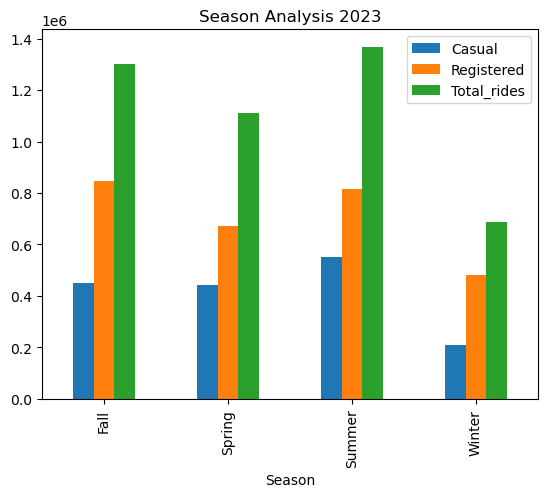

In [41]:
#sns.barplot(data=season_analysis_result)
season_analysis_result.plot.bar()
plt.title("Season Analysis 2023")

In [42]:
season_analysis_2023_copy.drop(["Total_rides"], axis=1, inplace=True)


In [43]:
season_analysis_2023_copy

,Season,Casual,Registered
0,Winter,3573,3214
1,Winter,3433,3807
2,Winter,2635,4924
3,Winter,2488,5303
4,Winter,2954,5455
...,...,...,...
360,Winter,646,1934
361,Winter,3099,4819
362,Winter,3491,5168
363,Winter,3097,4497


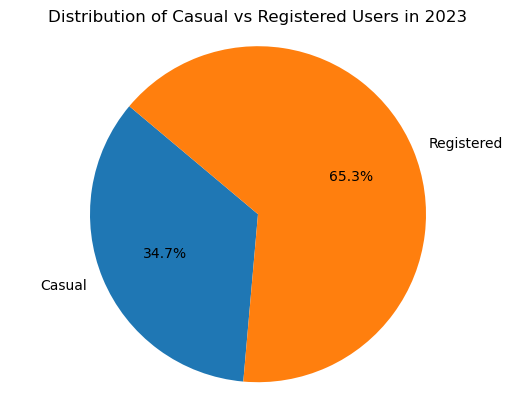

In [44]:
# Sample data


# Aggregate data by summing up 'Casual' and 'Registered' counts
season_counts = season_analysis_2023_copy.groupby('Season').sum().reset_index()

# Plotting
labels = ['Casual', 'Registered']
sizes = season_counts.loc[0, ['Casual', 'Registered']].values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Title
plt.title('Distribution of Casual vs Registered Users in 2023')

# Show plot
plt.show()


Text(0.5, 1.0, 'Ride Count based on Daily Apperent Temperature in 2023')

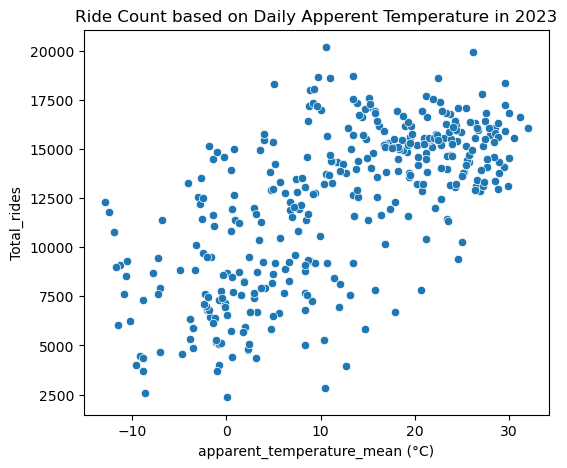

In [36]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x="apparent_temperature_mean (°C)", y="Total_rides",
      
             data=daily_2023)
plt.title("Ride Count based on Daily Apperent Temperature in 2023")